# Init

In [9]:
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
import time
from math import log
from math import sqrt

K = 1000 # number of arms
d = 10 # dimension
T = 10000 # time horizon
maxT = 10000
M = 100 # number of agents
C = 0.5 # constant
lam = 1 # global parameter
ins = [0] * (K + 1)
tracex = []
tracey = []

# Generate linear bandits sample
# ins[0]: theta*
# ins[1:K]: K arms
np.random.seed(187)

# Run

10000


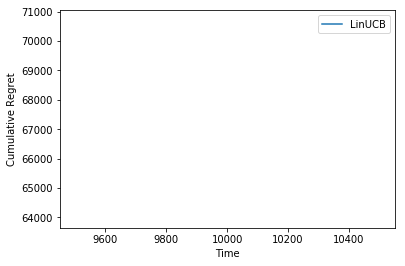

In [10]:
# Sample from arm k
def sample(k) :
    global ins
    return np.asscalar(np.dot(ins[0].T, ins[k])) + np.random.normal()

# solve the inner argmax problem
# max <x, theta> s.t. ||theta - theta_hat||_2 <= radius
#def solveArgmax(x, theta_hat, radius) :
#    return np.asscalar(np.dot(x.T, theta_hat)) + radius * np.linalg.norm(x) / sqrt(np.asscalar(x.T @ V @ x))

# solve the inner argmax problem
# max <x, theta> s.t. ||theta||_V <= radius
def solveArgmax(x, Vinv, radius) :
    return radius * sqrt(np.asscalar(x.T @ Vinv @ x))

# compute matrix square root
#def sqrtMat(A) :
#   u, s, v = np.linalg.svd(A)
#    s = np.diag(np.sqrt(s))
#    return u @ s @ v

# Run for horizon T
def simulate() :
    global K, d, T, C, lam, ins
    CumRegret = np.zeros((M,))
    regret = [-200]
    for i in range(K) :
        regret.append(np.asscalar(np.dot(ins[0].T, ins[i + 1])))
        if (regret[i + 1] > regret[0]) :
            regret[0] = regret[i + 1]
    for i in range(K) :
        regret[i + 1] = regret[0] - regret[i + 1]
        #if (regret[i + 1] > 0 and regret[i + 1] < gap) :
        #    gap = regret[i + 1]
        #print(regret[i + 1])
    #print(gap)
    #print(regret)
    for m in range(M) :
        V = lam * np.identity(d) 
        U = np.zeros((d, 1))
        Vlast = lam * np.identity(d)
        (sgn, VlastLogd) =  np.linalg.slogdet(Vlast)
        #access = np.zeros((K + 1,))
        
        bestarm = 1    
        for t in range(1, T + 1) :
            (sgn, logd) =  np.linalg.slogdet(V)
            #logd = 0
            if (t == 1 or logd > log(1 + C) + VlastLogd) :
                bestarm = 1
                bestval = -100000
                #sqrtV = sqrtMat(V)
                #sqrtVinv = np.linalg.inv(sqrtV)
                #theta_hat = sqrtV @ np.linalg.inv(V) @ U
                Vinv = np.linalg.inv(V)
                theta_hat = Vinv @ U
                radius = sqrt(logd - d * log(lam) + 2 * log(T)) + sqrt(lam) # delta = 1 / T
                for i in range(1, K + 1) :
                    val = np.asscalar(np.dot(ins[i].T, theta_hat)) + solveArgmax(ins[i], Vinv, radius)
                    if (val > bestval) :
                        bestval = val
                        bestarm = i

                VlastLogd = logd
        
            #access[bestarm] += 1
            y = sample(bestarm)
            CumRegret[m] += regret[bestarm]
            V += ins[bestarm] @ ins[bestarm].T
            U += y * ins[bestarm]

    return np.sum(CumRegret)

if __name__ == '__main__' :
    while (T <= maxT) :
        print(T)
        Reg = 0
        for experi in range(5) :
            Theta = np.random.normal(size=d)
            rho = 2 / sqrt(T)
            #Theta = Theta / np.linalg.norm(Theta)
            X=np.random.random(size=(K, d))*rho - np.ones((K, d))*0.5*rho
            ins[0] = Theta.reshape((d, 1))
            for i in range(1, K + 1) :
                ins[i] = X[i - 1].reshape((d, 1))    
            Reg += simulate()
        tracex.append(T)
        tracey.append(Reg / 5)
        #print(trace_test)
        T += 200
        
    File = open('LinUCB.txt', 'w')
    for k in range(len(tracex)) :
        File.write(str(tracex[k]) + ' ' + str(tracey[k]))
        File.write('\n')
    File.close()

    plt.plot(tracex, tracey, label = 'LinUCB')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Regret')
    plt.legend()
    plt.savefig('LinUCB.png')

    Finish = open('LinUCB_finish.txt', 'w')
    Finish.close()
